In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer=load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
x=pd.DataFrame(cancer.data,columns=cancer.feature_names)
y=pd.DataFrame(cancer.target)

In [8]:
print(x,y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [9]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.26,random_state=42)

In [10]:
train_x.shape

(421, 30)

In [11]:
test_x.shape

(148, 30)

In [12]:
lg=LogisticRegression()

In [13]:
lg.fit(train_x,train_y)
lg.score(train_x,train_y)
pred=lg.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.9594594594594594
[[53  4]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.96      0.98      0.97        91

    accuracy                           0.96       148
   macro avg       0.96      0.95      0.96       148
weighted avg       0.96      0.96      0.96       148



## AUC-ROC

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [39]:
prob_of_y=lg.predict_proba(test_x)[:,0]

In [40]:
prob_of_y

array([1.69416050e-01, 9.99999999e-01, 9.98929331e-01, 4.55619060e-03,
       1.15419754e-03, 1.00000000e+00, 1.00000000e+00, 9.91017698e-01,
       1.24669588e-03, 1.26577929e-02, 6.11207572e-02, 9.99729327e-01,
       9.38704343e-03, 8.57580077e-01, 2.15560549e-03, 9.99264044e-01,
       2.65914740e-03, 6.03141252e-04, 1.99980861e-03, 9.99999980e-01,
       1.53579304e-01, 1.80659388e-02, 1.00000000e+00, 6.27429833e-03,
       1.49142373e-02, 6.69388771e-04, 2.98313688e-03, 1.57862398e-02,
       7.52047817e-03, 9.99999999e-01, 8.28900624e-03, 1.19850197e-03,
       2.31463436e-02, 2.29305530e-02, 2.37076560e-03, 5.69226293e-03,
       9.97861605e-01, 4.80167682e-03, 9.99998929e-01, 2.49760962e-01,
       3.61972867e-03, 9.99336763e-01, 1.93507434e-03, 1.43491850e-02,
       2.52829693e-03, 5.62091191e-02, 1.63009605e-03, 1.69563010e-02,
       9.16867343e-02, 4.69893467e-03, 9.99974307e-01, 1.00000000e+00,
       1.26020640e-01, 1.03274191e-03, 1.84631492e-03, 2.55180548e-02,
      

In [36]:
prob_of_y.shape

(148, 2)

In [31]:
fpr,tpr,threshold=roc_curve(test_y,prob_of_y[:,1],pos_label=1)

In [32]:
fpr

array([0.        , 0.        , 0.        , 0.01754386, 0.01754386,
       0.07017544, 0.07017544, 1.        ])

In [33]:
tpr

array([0.        , 0.01098901, 0.94505495, 0.94505495, 0.97802198,
       0.97802198, 1.        , 1.        ])

In [34]:
threshold

array([1.99977140e+00, 9.99771397e-01, 8.52561360e-01, 8.46420696e-01,
       7.50239038e-01, 5.00228323e-01, 2.05425946e-01, 1.23942066e-32])

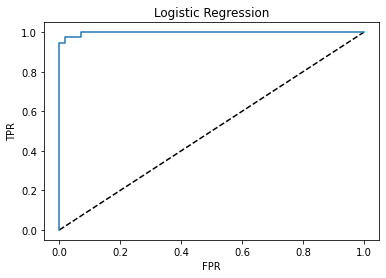

In [21]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression')
plt.show()

In [22]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))

In [23]:
print(auc_score)

0.9539232697127434


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
y_pred=dtc.predict(test_x)
print(accuracy_score(test_y,y_pred))

0.9459459459459459


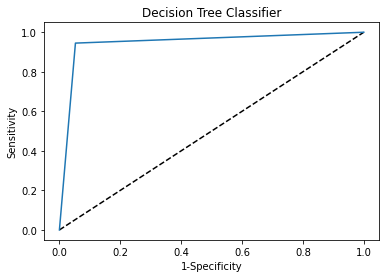

In [25]:
pred_y=dtc.predict_proba(test_x)[:,1]
fpr,tpr,threshold=roc_curve(test_y,pred_y)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Decision Tree Classifier')
plt.show()

In [26]:
auro_score=roc_auc_score(test_y,y_pred)
auro_score

0.9462116830537884

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

gnb=GaussianNB()
svc=SVC()

classifier=[lg,gnb,svc,dtc]
for i in classifier:
    i.fit(train_x,train_y)
    i.score(train_x,train_y)
    m_pred=i.predict(test_x)
    print(f'Conclusion of {i} model:')
    print(accuracy_score(test_y,m_pred))
    print(confusion_matrix(test_y,m_pred))
    print(classification_report(test_y,m_pred))
    print('\n')

Conclusion of LogisticRegression() model:
0.9594594594594594
[[53  4]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.96      0.98      0.97        91

    accuracy                           0.96       148
   macro avg       0.96      0.95      0.96       148
weighted avg       0.96      0.96      0.96       148



Conclusion of GaussianNB() model:
0.9594594594594594
[[54  3]
 [ 3 88]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        57
           1       0.97      0.97      0.97        91

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148



Conclusion of SVC() model:
0.9391891891891891
[[49  8]
 [ 1 90]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        57
           1    